# Regression and Least Squares

Earlier, we encountered interpolation as a means to determine a line given only a few points.  Interpolation determined a polynomial that would go through each point.  This is not always sensible however.

Let's consider the following example where the data represents cigarette consumption and death rates for countries given.

| Country | Cigarette Consumption | Deaths per Million | 
| ------ | ------ | ------ | 
| Norway | 250 | 95 |
| Sweden | 300 | 120 |
| Denmark | 350 | 165 |
| Australia | 470 | 170 |

If we use interpolation as we had earlier, we get the following picture.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import matplotlib as mpl

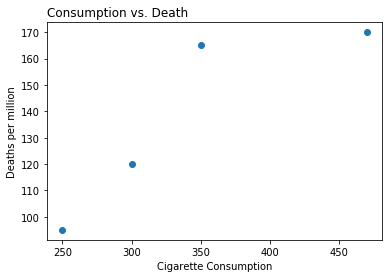

In [2]:
cigs = [250, 300, 350, 470]
death = [95, 120, 165, 170]

plt.scatter(cigs, death)
plt.xlabel("Cigarette Consumption")
plt.ylabel("Deaths per million")
plt.title("Consumption vs. Death", loc = "left");

Now suppose that we wanted to use our polynomial to make a prediction about a country with higher cigarette consumption than that of Australia.  You should notice that our polynomial would provide an estimate that is lower.

Alternatively, we can fit a straight line to the data with a simple numpy function `polyfit` where we describe the data we are fitting and the degree polynomial we are fitting.  Here we want a straight line so we choose degree 1.

This results in an equation of the form $\hat y_i = ax_i + b$.

In [3]:
a, b = np.polyfit(cigs, death, 1)

In [4]:
def l(x): return a*x + b

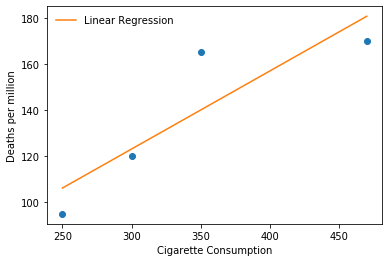

In [5]:
plt.plot(cigs, death, 'o')
plt.plot(cigs, [l(i) for i in cigs], label = 'Linear Regression')

plt.xlabel("Cigarette Consumption")
plt.ylabel("Deaths per million")
plt.legend(loc = 'best', frameon = False)

## Determining the Line of Best Fit

The idea behind our line of best fit, is that it minimizes the distance between itself and all the data points.  These distances are called residuals and are shown in the plot below.

Text(0.5, 1.0, 'Residuals')

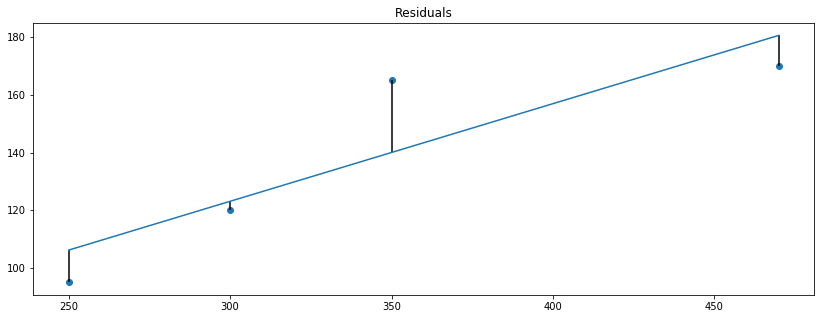

In [6]:
plt.figure(figsize = (14, 5))
plt.scatter(cigs, death)
plt.plot(cigs, [l(i) for i in cigs], label = 'Linear Regression')
#vertical lines at each value of cigs
#starting at the true value
#ending at the predicted value
for i in range(len(cigs)):
    plt.vlines(cigs[i], death[i], l(cigs[i]))
plt.title("Residuals")

The line of best fit minimizes these distances using familiar techniques of differentiation that we have studied.  First, we investigate the criteria of least squares, that says the residuals are minimized by finding the smallest **ROOT MEAN SQUARE ERROR** or **RMSE**.  

In general, we see that a residual is the distance between some actual data point $(x_i, y_i)$ and the resulting point on the line of best fit $l(x)$ at the point $(x_i, l(x_i))$.

Suppose we were deciding between the lines

$$y_1 = .3x + 34.75 \quad y_2 = .4x + .5$$

We want to compare the average difference between the actual and predicted values.  We can find the residuals by creating a list of differences in terms of actual and predicted values.

In [7]:
def y1(x): return 0.3*x + 34.75
def y2(x): return 0.4*x + 0.5

Text(0.5, 1.0, 'Which is the Better Fit?')

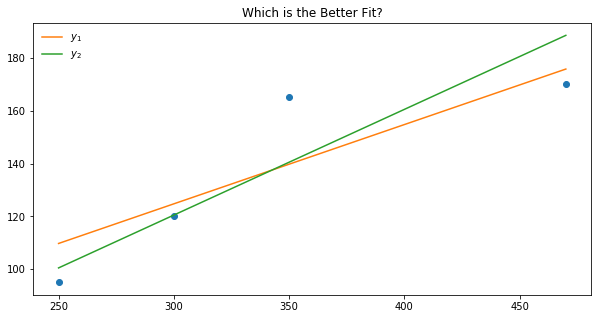

In [8]:
plt.figure(figsize = (10,5))
plt.plot(cigs, death, 'o')
plt.plot(cigs, [y1(i) for i in cigs], label = '$y_1$')
plt.plot(cigs, [y2(i) for i in cigs], label = '$y_2$')
plt.legend(frameon=False)
plt.title("Which is the Better Fit?")

In [9]:
resid_1 = [(death[i] - y1(cigs[i]))**2 for i in range(len(cigs))]
resid_2 = [(death[i] - y2(cigs[i]))**2 for i in range(len(cigs))]

In [10]:
resid_1

[217.5625, 22.5625, 637.5625, 33.0625]

In [11]:
resid_2

[30.25, 0.25, 600.25, 342.25]

In [13]:
mse_1 = np.mean(resid_1)
mse_2 = np.mean(resid_2)

In [14]:
print('The MSE for line 1 is {}\nand for line 2 {} '.format(mse_1, mse_2))

The MSE for line 1 is 227.6875
and for line 2 243.25 


In [17]:
rmse_1 = np.sqrt(mse_1)
rmse_2 = np.sqrt(mse_2)

In [18]:
print('The MSE for line 1 is {}\nand for line 2 {} '.format(rmse_1, rmse_2))

The MSE for line 1 is 15.08931741332258
and for line 2 15.596473960482221 


Thus, the first line $y1$ is considered a better fit for the data.

## Deriving the Equation of the Line

In general, we have some line of best fit $y$ given by:

$$y = a + bx$$

If we have some set of points $(x_1, y_1), (x_2, y_2), (x_3, y_3)...(x_n, y_n)$.  We need to minimize the sum of squares of residuals here, so we would have a number of values determined by:

$$[y_1 - (a + bx_1)]^2 + [y_2 - (a + bx_2)]^2 + [y_3 - (a + bx_3)]^2 + ... $$

which we can rewrite in summation notation as 

$$\sum_{i=1}^n[y_i - (a + bx_i)]^2$$

We can consider this as a function in terms of the variable $a$ that we are seeking to minimize.

$$g(a) = \sum_{i=1}^n[y_i - (a + bx_i)]^2$$

From here, we can apply our familiar strategy of differentiating the function and locating the critical values.  We are looking for the derivative of a sum, which turns out to be equivalent to the sum of the derivatives, hence we have

$$g'(a) = \sum_{i=1}^n \frac{d}{da}[y_i - (a + bx_i)]^2$$

$$g'(a) = \sum_{i=1}^n 2[y_i -a - bx_i](-1)$$

$$g'(a) = -2 [\sum_{i = 1}^n y_i - a - b\sum_{i=1}^n x_i]$$

Setting this equal to zero and solving for $a$ we get

$$a = \frac{1}{n} \sum_{i=1}^n y_i - b\frac{1}{n} \sum_{i=1}^n x_i$$

The terms should be familiar as averages, and we can rewrite our equation as

$$a = \bar{y} - b \bar{x}$$

We now use this to investigate a similar function in terms of $b$ to complete our solution.

$$f(b) = \sum_{i=1}^n[y_i - (\bar{y} + b(x_i - \bar{x}))]^2$$

We end up with 

$$b = \sum_{i = 1}^n \frac{(x_i - \bar{x})(y_i - \bar{y})}{(\bar{x} - x_i)^2}$$

Let's return to the problem of cigarette consumption and test our work out by manually computing $a$ and $b$.

Text(0.5, 1.0, 'Cigarette Consumption vs. Deaths')

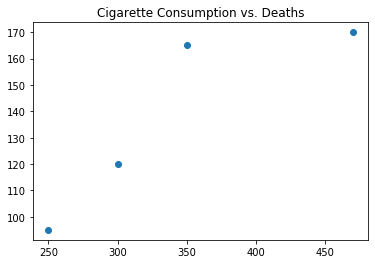

In [19]:
cigs = [250, 300, 350, 470]
death = [95, 120, 165, 170]

plt.scatter(cigs, death)
plt.title("Cigarette Consumption vs. Deaths")

In [20]:
ybar = np.mean(death)
xbar = np.mean(cigs)
ydiff = (death - ybar)
xdiff = (cigs - xbar)

b = np.sum(ydiff*xdiff)/np.sum(xdiff**2)
a = ybar - b*xbar
a, b

(21.62136832239925, 0.338331771321462)

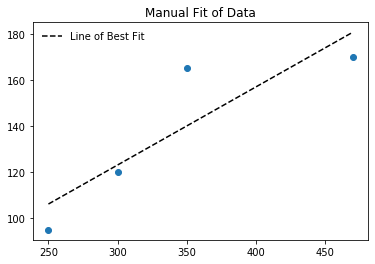

In [21]:
l = [a + b*i for i in cigs]
plt.scatter(cigs, death)
plt.plot(cigs, l, '--k', label = 'Line of Best Fit')
plt.title("Manual Fit of Data")
plt.legend(loc = 'best', frameon = False)

We can check with numpy and see if our values for $a$ and $b$ agree with the computer model.

In [22]:
a2, b2 = np.polyfit(cigs, death, 1)
a2, b2

(0.3383317713214621, 21.621368322399235)

Finally, we can write a simple function to compute the RMSE.

In [25]:
def l(x): return a2*x + b2 #our model
approx = [l(i) for i in cigs] #compute approximations
error = [approx[i] - death[i] for i in range(len(cigs))] #error in each approximation
squared_error = [i**2 for i in error] #error squared
mse = np.mean(squared_error) #mean squared error
rmse = np.sqrt(mse) #root mean squared error

In [26]:
print('The RMSE is {:.3f}'.format(rmse))

The RMSE is 14.761


## Other Situations

Our goal with regression is to identify situations where regression makes sense, fit models and discuss the reasonableness of the model for describing the data.  Data does not always come in linear forms however.  

We can easily generate sample data for familiar curves.  First, we can make some lists of polynomial form, then we will add some noise to these, fit models with `np.polyfit()`, and plot the results.  




### Non-Linear Functions

Plotting and fitting non-linear functions follows a similar pattern, however we need to take into consideration the nature of the function.  First, if we see something following a polynomial pattern, we can just use whatever degree polynomial fit we believe is relevant.  The derivation of these formulas follows the same structure as the linear case, except you are replacing the line $a - bx_i$ with a polynomial $a + bx_i + cx_i^2...$.

If we believe there to be an exponential fit, we can transform this into a linear situation using the logarithm.  For example, suppose we have the following population data.

| Decade $t$ | Year | Population |
| ----- | ------ | ----- |
| 0 | 1780 | 2.8 | 
| 1 | 1790 | 3.9 | 
| 2 | 1800 | 5.3 | 
| 3 | 1810 | 7.2 |

If we examine the data, we see an exponential like trend.  If we use NumPy to find the logarithm of the population values and plot the result, we note the transformed datas similarity to a linear function.

In [27]:
t = np.arange(0,13)
year = np.arange(1780,1910,10)
P = [2.8, 3.9, 5.3, 7.2, 9.6, 12.9, 17.1, 23.2, 31.4, 39.8, 50.2, 62.9, 76.0]

Text(0.5, 1.0, 'Year vs. Log of Population')

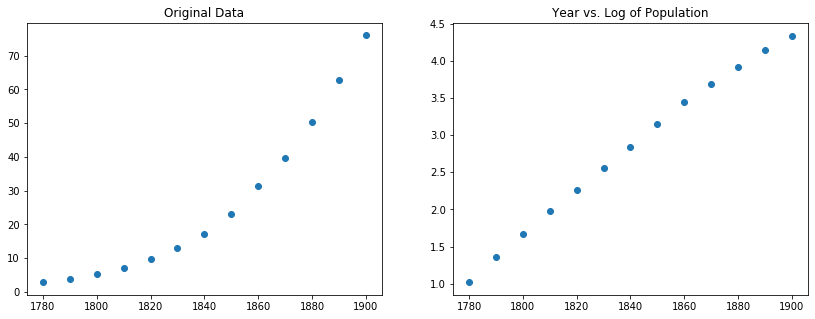

In [28]:
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.scatter(year, P)
plt.title("Original Data")


plt.subplot(122)
plt.scatter(year, np.log(P))
plt.title("Year vs. Log of Population")

Symbolically, we would imagine the original function as an exponential of the form

$$y = ae^{bx}$$

The expression can be explored in a similar manner, where we use Sympy to find the effect of the logarithm.

In [29]:
y, a, b, x = sy.symbols('y a b x')

In [30]:
eq = sy.Eq(y, a*sy.exp(b*x))

In [31]:
sy.expand_log(sy.log(b**x))

log(b**x)

In [32]:
sy.expand_log(sy.log(a*sy.exp(b*x)), force = True)

b*x + log(a)

Hence, we have that

$$\log(y) = bx + \log(a)$$

which should look like our familiar linear equations.  Here, we can find $a$ and $b$, then convert the equation back to its original form by undoing the logarithm with the exponential.